In [9]:
import tensorflow as tf
import numpy as np
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Sequential

import matplotlib.pyplot as plt


In [10]:
(x_train, _), (x_test, _) = mnist.load_data()

In [11]:
# preprocessing
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

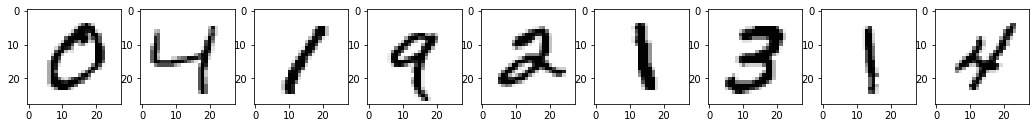

In [12]:
# before add noise
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_train[i].reshape(28, 28), cmap="binary")
plt.show()

In [13]:
# adding some noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

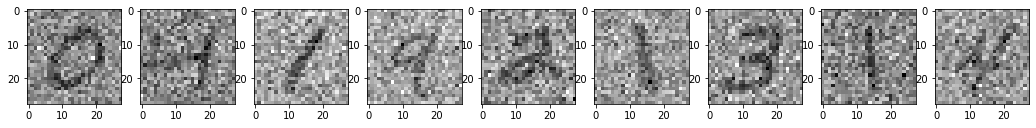

In [14]:
# show noise
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_train_noisy[i].reshape(28, 28), cmap="binary")
plt.show()

In [15]:
# ทำให้ค่าอยู่ในช่วง 0-1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

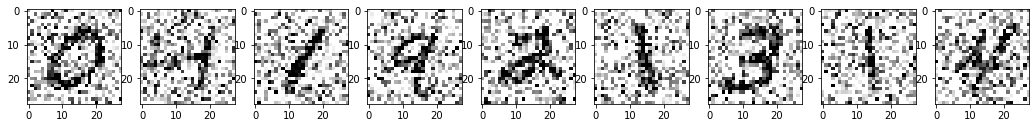

In [16]:
# after clip
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_train_noisy[i].reshape(28, 28), cmap="binary")
plt.show()

In [17]:
x_train.shape

(60000, 28, 28, 1)

In [18]:
x_train_noisy.shape

(60000, 28, 28, 1)

In [19]:
x_test_noisy.shape

(10000, 28, 28, 1)

In [20]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1))) # 28
model.add(MaxPooling2D((2, 2), padding='same')) # 14
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same')) # 7
model.add(Conv2D(8, (3, 3), activation='relu', padding='same')) 

# encoder
model.add(MaxPooling2D((2, 2), padding='same')) # 4
 
# decoder
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2))) # 8
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2))) # 16
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(UpSampling2D((2, 2))) # 28
model.add(Conv2D(1, (3, 3), activation='relu', padding='same')) # 28

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         2312      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 8)          0

In [21]:
model.fit(x_train_noisy, x_train, epochs=10, batch_size=256, shuffle=True,
          verbose=0,
          validation_data=(x_test_noisy, x_test))

In [22]:
model.evaluate(x_test_noisy, x_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0223


0.02231431007385254

In [23]:
after_denoise = model.predict(x_test_noisy)

313/313 [==============================] - 1s 3ms/step


In [24]:
after_denoise[0].shape

(28, 28, 1)

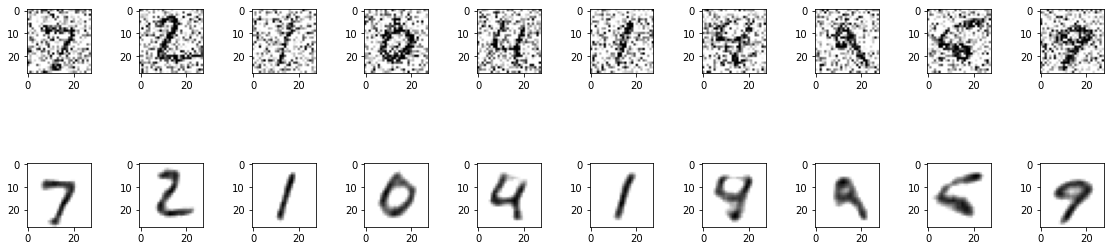

In [25]:
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
    
    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40 + i + 1)
    plt.imshow(after_denoise[i].reshape(28, 28), cmap="binary")

plt.show()